In [2]:
import numpy as np
x = np.random.normal(loc=1, scale=10, size=(3,4))
#x
#np.sum(x, axis=1)
#np.mean(x, axis=0)
#np.std(x, axis=0)
#np.nonzero(np.sum(x, axis=1) > 10)
#np.concatenate((np.eye(3, 3, k=0), np.eye(3, 3, k=0)))

In [1]:
import pandas as pd

pd.set_option("display.max_rows", None)
data = pd.read_csv('titanic.csv', index_col='PassengerId')
#data

In [196]:
#1st week, firstAnswer
with open("firstAnswer.txt", "w") as file:
    for i in data['Sex'].value_counts().tolist():
        print(i, file=file, end = ' ')

In [251]:
#1st week, secondAnswer
sur = data['Survived'].value_counts()
with open("secondAnswer.txt", "w") as file:
    if sur.index[0] == 1:
        i = 0
    else:
        i = 1
    print("%.2f" % (100 * sur[i] / data['Survived'].count()), file=file, end = ' ')

In [264]:
#1st week, thirdAnswer
cla = data['Pclass'].value_counts()
with open("thirdAnswer.txt", "w") as file:
    for i in range(0,3):
        if cla.index[i] == 1:
            break
    print("%.2f" % (100 * cla[i] / data['Pclass'].count()), file=file, end = ' ')

In [318]:
#1st week, fourthAnswer
with open("fourthAnswer.txt", "w") as file:
    print("%.2f" % data['Age'].mean(), "%.2f" % data['Age'].median(), file=file, end = ' ')

In [326]:
#1st week, fifthAnswer
with open("fifthAnswer.txt", "w") as file:
    print(data[['SibSp', 'Parch']].corr()['Parch'][0], file=file, end = ' ')

In [617]:
#1st week, sixthAnswer
#подсчет не точный (Mrs - иногда распознает как имя, не учитываются разные формы одного имени)
with open("sixthAnswer.txt", "w") as file:
    list = []
    for i in data.axes[0]:
        if data['Sex'][i] == 'female':
            j = data['Name'][i].find('(')
            if j > -1:
                j += 1
            else:
                j = data['Name'][i].find('.') + 2
            name = ''
            while j < len(data['Name'][i]) and data['Name'][i][j] != ' ':
                name += data['Name'][i][j]
                j += 1
            name = name.strip(')')
            name = name.strip('"')
            list.append(name)
    from collections import Counter
    for i in Counter(list).keys():
        if Counter(list)[i] == Counter(list)[max(Counter(list), key=Counter(list).get)]:
            print(i, file=file, end = ' ')

In [1]:
#1st week, решение 6й задачи с помощью словаря бабских имен
with open("femaleName.txt", "r") as file:
    i = file.read(1)
    flag = True
    list = []
    name = ''
    while i:
        if flag:
            if ord(i) > 96 and ord(i) < 123 or ord(i) > 64 and ord(i) < 91:
                name += i
            else:
                flag = False
                name = name.lower()
                list.append(name)
        else:
            if ord(i) > 96 and ord(i) < 123 or ord(i) > 64 and ord(i) < 91:
                flag = True
                name = i
        i = file.read(1)
    #print(list)
    
with open("testtext.txt", "r") as file:
    i = file.read(1)
    flag = True
    name = ''
    listNames = []
    while i:
        if flag:
            if ord(i) > 96 and ord(i) < 123 or ord(i) > 64 and ord(i) < 91:
                name += i
            else:
                flag = False
                name = name.lower()
                #print(name)
                if list.count(name) != 0:
                    listNames.append(name)
        else:
            if ord(i) > 96 and ord(i) < 123 or ord(i) > 64 and ord(i) < 91:
                flag = True
                name = i
        i = file.read(1)
    #print(listNames)
    
    #from collections import Counter
    #sorted(Counter(listNames), key=Counter(listNames).get)
    #print(Counter(listNames))

In [12]:
#1st week, задание: решающие деревья
dataD = data[['Pclass', 'Fare', 'Age', 'Sex', 'Survived']]
dataD = dataD.dropna()

dataA = dataD[['Survived']]

dataTlist = []
for i in dataD['Sex']:
        if i == 'female':
            dataTlist.append(0)
        else:
            dataTlist.append(1)
dataT = dataD[['Pclass', 'Fare', 'Age']]
dataT.insert(3,'Survived',dataTlist)

import numpy as np
from sklearn.tree import DecisionTreeClassifier
X = np.array([[1, 2], [3, 4], [5, 6]])
y = np.array([0, 1, 0])
clf = DecisionTreeClassifier(random_state=241)
clf.fit(dataT, dataA)


#from sklearn.tree import export_graphviz
#export_graphviz(clf, feature_names=['Pclass', 'Fare', 'Age', 'Sex'], out_file = 'tree.dot', filled=True)
#!dot -Tpng 'tree.dot' -o 'tree.png'

importances = clf.feature_importances_
#print(importances)
#print(dataT)

#test of the visualization
#import graphviz
#from sklearn import tree
#dot_data = tree.export_graphviz(clf, out_file=None)
#graph = graphviz.Source(dot_data)
#graph.render("iris")

[0.14000522 0.30343647 0.2560461  0.30051221]


In [158]:
#запись в файл без добавления символа конца строки в конец файла
#printf "Mary" > 6otvet.txt

f = open('2week_2task.txt', 'w')
f.write("1.135678391959799")
f.close()

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option("display.max_rows", None)
#df = pd.DataFrame({ 'A' : 1., 'B' : np.array([3] * 3), 'C' : 6.})
#df = pd.DataFrame(np.random.randint(0, 7, (9, 4)), columns=list('ABCD'))
#print(df)
#df.apply(np.max, axis=1)
#pd.crosstab(df['B'], [df['C'], df['D']])
#data.groupby('Sex').sum().plot()

In [1]:
#2nd week, 1st task, k ближайших соседей
import pandas as pd

pd.set_option("display.max_rows", None)
wData = pd.read_csv('wineData.txt', usecols=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13], names=['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'])
wClass = pd.read_csv('wineData.txt', usecols=[0], names=['1'])

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np

g = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for k in range(1, 51):
    ##for train_index, test_index in kf.split(wData):
        #print("TRAIN:", train_index, "TEST:", test_index)
        
        #neigh = KNeighborsClassifier(n_neighbors=k)
        #print(cross_val_score(neigh.fit(wData.loc[train_index], wClass['1'].loc[train_index]), wData.loc[test_index], wClass['1'].loc[test_index], cv=kf))
        #print("k=", k)
        
        #print(np.mean(cross_val_score(neigh.fit(wData.loc[train_index], wClass['1'].loc[train_index]), wData.loc[test_index], wClass['1'].loc[test_index], cv=kf)))
        #X_train, X_test = wData[train_index], wData[test_index]
        #y_train, y_test = y[train_index], y[test_index]
    g.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), wData, wClass['1'], cv=kf)))

import matplotlib.pyplot as plt
#plt.plot(g)
#plt.ylabel('some numbers')
#plt.axis([0, 50, 0, 1])
#plt.show()

from sklearn.preprocessing import scale
wData2 = scale(wData)
wData2

j = []
for k in range(1, 51):
    j.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k), wData2, wClass['1'], cv=kf)))

#plt.plot(j)
#plt.show()
#j.index(max(j))

3
1.135678391959799


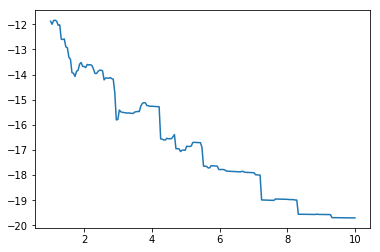

In [157]:
#2nd week, 2nd task, выбор метрики
#неверный вопрос в задании, нужно брать не среднее из блоков, а макс
from sklearn.datasets import load_boston
bData = load_boston()

from sklearn.preprocessing import scale
bData.data = scale(bData.data)

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

g = []
j = []
kf = KFold(n_splits=5, shuffle=True, random_state=42)
for p in np.linspace(1, 10, num=200):
    j.append(p)
    #g.append(np.mean(cross_val_score(KNeighborsClassifier(n_neighbors=k).fit(wData2, wClass['1']), wData2, wClass['1'], cv=kf)))
    #cross_val_score(KNeighborsRegressor(n_neighbors=5, weights='distance').fit(bData.data, bData.target), bData.data, bData.target, cv=kf)
    #g.append(np.mean(cross_val_score(KNeighborsRegressor(n_neighbors=5, p=p, weights='distance'), bData.data, bData.target, scoring='neg_mean_squared_error', cv=kf)))
    neigh = KNeighborsRegressor(n_neighbors=5, p=p, weights='distance')
    #neigh.fit(bData.data, bData.target)
    g.append(max(cross_val_score(neigh, bData.data, bData.target, scoring='neg_mean_squared_error', cv=kf)))

#print(g.index(max(g)))
#print(j[g.index(max(g))])


#import matplotlib.pyplot as plt
#plt.plot(j,g)
#plt.ylabel('some numbers')
#plt.axis([0, 50, 0, 1])
#plt.show()

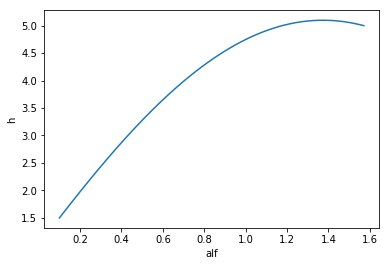

78.69645990538066
angA = 78.69006752597979 angB = 45.0 bet = 78.90419664952016
gam = 78.90419671686367


In [75]:
#уравнение данной плоскости: z = y*ha +x*hb
#grad = (hb, ha)
#A(1,0,0), B(0,1,0); ha > hb - высоты этих точек
#alf - угол между ox и вектором в плоскости xoy в радианах
#bet - угол между вектором в плоскости xoy и плоскостью z
#gam - угол между градиентом и плоскостью z

import numpy as np
ha, hb = 5, 1
list_alf, list_h, list_bet = [], [], []
for alf in np.linspace(0.1, np.pi/2, num=1000):
    list_alf.append(alf)
    a = np.sin(alf)/np.sin(np.pi - np.pi/4 - alf)
    has = a*(ha - hb)/np.sqrt(2) + hb
    r1 = np.sin(np.pi/4)/np.sin(np.pi - np.pi/4 - alf)
    h = 1*has/r1
    list_h.append(h)
    bet = np.arctan(has/r1)
    list_bet.append(bet)

import matplotlib.pyplot as plt
plt.plot(list_alf,list_h)
plt.ylabel('h')
plt.xlabel('alf')
#plt.axis([0, 50, 0, 1])
plt.show()

#вывод угла alf в градусах, при котором происходит наибольший рост функции
print(list_alf[list_h.index(max(list_h))]*180/np.pi)
#вывод угла bet в градусах
print("angA =", np.arctan(ha/1)*180/np.pi, "angB =", np.arctan(hb/1)*180/np.pi, "bet =", list_bet[list_h.index(max(list_h))]*180/np.pi)

gam = np.arcsin(np.absolute(hb*hb + ha*ha - 1*0)/np.sqrt(hb**2 + ha**2 + (-1)**2)/np.sqrt(hb**2 + ha**2 + (0)**2))
print("gam =", gam*180/np.pi)